<img src = https://ibm.box.com/shared/static/ugcqz6ohbvff804xp84y4kqnvvk3bq1g.png width = 200>
<h1 align=center> k-means Clustering using Numpy </h1>
<hr>

#### Initialize the environment and import the required modules

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#### Define `shouldStop` as a function that returns:
- `True`, if there have been more than 10 iterations
- `True`, if the newly assigned centroids are in the same position as the old centroids
- otherwise it returns `False`

In [2]:
def shouldStop(oldCentroids, centroids, iterations):
    if iterations > 10: return True
    return (centroids==oldCentroids).all()

#### Define `distEuclid` as a function that returns:
- the Euclidean distance between two vectors, `vecA` and `vecB`

In [3]:
def distEuclid(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2))) 

#### Define `getLabels" as a function that assigns labels to each datapoint based on centroids

In [4]:
def getLabels(dataSet, centroids):
    m = dataSet.shape[0];k = centroids.shape[0]
    clusterAssment=np.empty([m,2])
    for i in range(m):
        minDist = float('inf')
        minIndex = -1
        for j in range(k):
            distJI = distEuclid(centroids[j,:],dataSet[i,:])
            if distJI < minDist:
                minDist = distJI; minIndex = j
        clusterAssment[i,:] = minIndex,minDist**2
    return clusterAssment

#### Define `getCentroids` as a function that recalculates (moves) centroids' positions

In [5]:
def getCentroids(dataSet, labels, k):    
    for cent in range(k):
        ptsInClust = dataSet[np.nonzero(labels[:,0]==cent)[0]]#get all the point in this cluster
        centroids[cent,:] = np.mean(ptsInClust, axis=0) #move centroid to mean 
    return centroids

#### Read in data and convert into np

In [6]:
!wget -O data2d.csv https://ibm.box.com/shared/static/nbin9unisgcfmxk9ig31af24p7te0teg.csv

--2018-05-24 15:37:26--  https://ibm.box.com/shared/static/nbin9unisgcfmxk9ig31af24p7te0teg.csv
Resolving ibm.box.com (ibm.box.com)... 107.152.26.197, 107.152.27.197
Connecting to ibm.box.com (ibm.box.com)|107.152.26.197|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ibm.ent.box.com/shared/static/nbin9unisgcfmxk9ig31af24p7te0teg.csv [following]
--2018-05-24 15:37:27--  https://ibm.ent.box.com/shared/static/nbin9unisgcfmxk9ig31af24p7te0teg.csv
Resolving ibm.ent.box.com (ibm.ent.box.com)... 107.152.27.211
Connecting to ibm.ent.box.com (ibm.ent.box.com)|107.152.27.211|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://public.boxcloud.com/d/1/OKRTwNXXMWtWDw9h6v127pDbf_5DHOydB5n2wRhJKeFdRa7Ykywsij2kOUgiyk92YJFByXzndhF6w38sfVyQsYM7LzRltwItZ8Ix9ocNszjADd9_3vViHPMwj_eQ1Uj70twtm2e5NdaO4XsfIUlRSnFJRufp3a1148grOgXbUWsNKuAM3dnCzEh1X2USO5tf-YAM7-VDZyCRp9KtFwpGWE2dXoSrIdAhCiVtHEs4Wpf9Oby_JREQO4Y3ZSN7MZ_LW9eBe59Y_

In [7]:
dataFile=[]
with open("data2d.csv") as inputfile:
    for line in inputfile:
        words = line.strip().split(',')
        dataFile.append(words)
dataSet=np.asarray(dataFile, dtype = float)  


#### Initialize centroids at random locations:

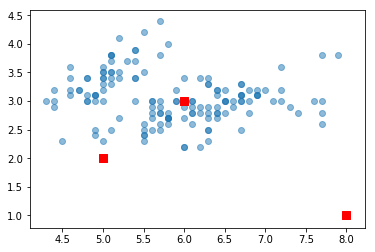

In [8]:
centroids = np.asarray([[8., 1.], [5., 2.], [6., 3.]])    #original

plt.figure(1)
plt.clf()
plt.scatter(dataSet[:, 0], dataSet[:, 1],alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1],s=50, c=u'r', marker=u's')
plt.show()

#### Initialize some variables:

In [9]:
numFeatures = 2
k=3
iterations = 0
oldCentroids = np.empty([k,numFeatures])

#### Run the main k-means algorithm:

0
[2. 1. 1. 1. 2. 2. 1. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 1. 1. 2. 2. 1. 2. 1.
 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 0. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[[7.7        2.6       ]
 [4.864      2.784     ]
 [6.02580645 3.11209677]]


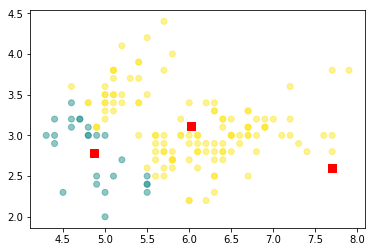

1
[1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 2. 1. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 1. 0. 2. 2. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 2. 0. 1. 0. 2. 0. 2. 2. 2. 2. 2. 2. 2. 0. 0. 2.
 2. 2. 0. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2.]
[[7.43846154 3.13076923]
 [4.952      3.09      ]
 [6.11724138 3.02183908]]


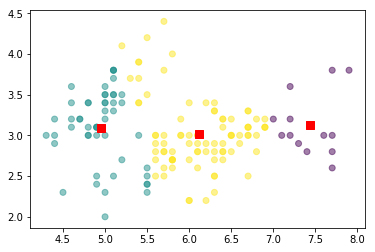

2
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 0. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 1. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 2. 0. 1. 0. 2. 0. 2. 2. 0. 2. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 2. 0. 2. 0.
 2. 2. 2. 2. 2. 2.]
[[7.25789474 3.12631579]
 [4.99285714 3.23571429]
 [6.12       2.9       ]]


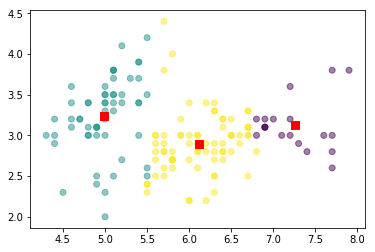

3
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 0. 2. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 2. 0. 1. 0. 2. 0. 2. 2. 0. 2. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 2. 2. 2.]
[[7.0962963  3.11481481]
 [5.01403509 3.30350877]
 [6.0469697  2.81363636]]


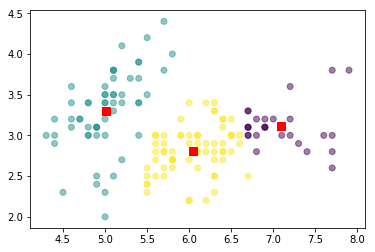

4
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 0. 2. 2. 2. 2. 1. 0. 1. 1. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 2. 0. 1. 0. 2. 0. 2. 2. 0. 2. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 2. 2. 2.]
[[7.06206897 3.10344828]
 [5.01403509 3.30350877]
 [6.0296875  2.809375  ]]


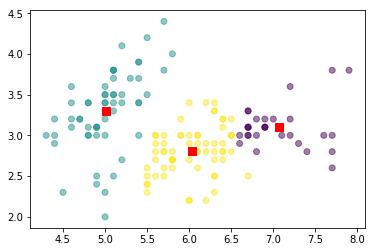

5
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 0. 2. 2. 2. 2. 1. 0. 1. 1. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 2. 0. 1. 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 2. 2. 2.]
[[7.03225806 3.08709677]
 [5.01403509 3.30350877]
 [6.01129032 2.80806452]]


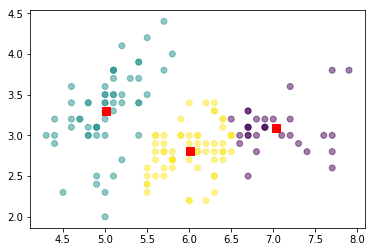

6
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 0. 2. 2. 2. 2. 1. 0. 1. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 2. 0. 1. 0. 0. 0. 0. 2. 0. 2. 2. 2. 2. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 2. 2. 2.]
[[7.03225806 3.08709677]
 [5.01428571 3.32678571]
 [5.9952381  2.7952381 ]]


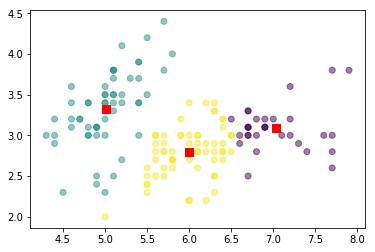

7
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 2. 0. 2. 2. 2. 2. 1. 0. 1. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 0. 0. 1. 0. 0. 0. 0. 2. 0. 2. 2. 2. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 0. 2. 2.]
[[6.98529412 3.07941176]
 [5.01428571 3.32678571]
 [5.97       2.785     ]]


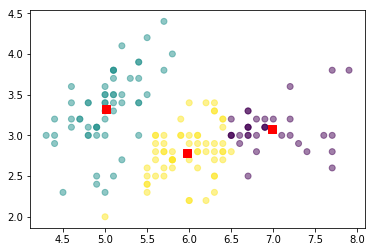

8
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 2. 2. 2. 2. 1. 0. 1. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 0. 0. 1. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 2. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 0. 2. 2.]
[[6.95277778 3.08611111]
 [5.01428571 3.32678571]
 [5.95517241 2.77068966]]


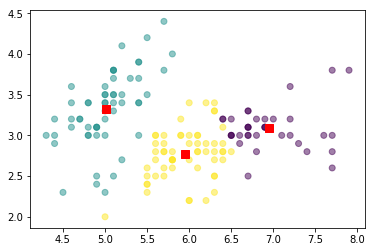

9
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 2. 0. 2. 2. 1. 0. 1. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 0. 0. 1. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 2. 0. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 0. 2. 2.]
[[6.92631579 3.07894737]
 [5.01428571 3.32678571]
 [5.9375     2.76428571]]


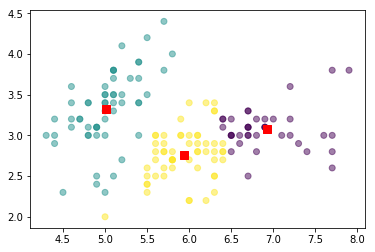

10
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 2. 0. 2. 2. 1. 0. 1. 2. 2. 2. 2. 2. 0. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 0. 0. 0. 2. 2. 2. 2. 2. 2. 1. 2. 0. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 2. 2. 0. 2. 0. 0. 1. 0. 0. 0. 0. 2. 0. 2. 2. 0. 0. 0. 0. 2.
 0. 2. 0. 2. 0. 0. 2. 2. 2. 0. 0. 0. 2. 2. 2. 0. 0. 0. 2. 0. 0. 0. 2. 0.
 0. 0. 2. 0. 2. 2.]
[[6.91025641 3.08717949]
 [5.01428571 3.32678571]
 [5.93090909 2.75272727]]


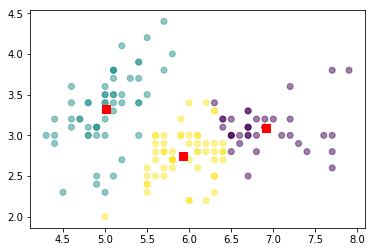

In [10]:
while not shouldStop(oldCentroids, centroids, iterations):
    print(iterations)
    oldCentroids = centroids.copy() # Save old centroids for convergence test.
    iterations += 1
    
    # Assign labels to each datapoint based on centroids
    labels = getLabels(dataSet, centroids)
    centroids = getCentroids(dataSet, labels, k)
    print(labels[:,0]);    print(centroids)
    plt.figure(1)
    plt.clf()
    plt.scatter(dataSet[:, 0], dataSet[:, 1], c=labels[:,0],alpha=0.5)
    plt.scatter(centroids[:, 0], centroids[:, 1],s=50, c=u'r', marker=u's')
    plt.show()

#### Visualize the final results

In [ ]:
print(labels[:,0])

fig = plt.figure(1)
plt.clf()
plt.scatter(dataSet[:, 0], dataSet[:, 1], c=labels[:,0],alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1],s=50, c=u'r', marker=u's')
plt.show()

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler](http://cocl.us/ML0101EN-SPSSModeler).

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at [Watson Studio](https://cocl.us/ML0101EN_DSX)

### Thanks for completing this lesson!

Notebook created by: <a href = "https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>

<hr>
Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).​